In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('test1_modify5.csv')

In [3]:
df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0


### 날씨가 사람의 건강에 미치는 영향
- 여름에는 열사병, 겨울에는 동상 위험
- heat index(온도, 습도), wind chill(겨울 체감 온도)


<img src="D:\\머신러닝\\heat_index.png">

<img src="heat_index_furmula.png">

In [4]:
T = 42   # temp
R = 40   # humid

# result : 54
def heat_index(T, R):
    c1 = -8.78469475556
    c2 = 1.61139411
    c3 = 2.33854883889
    c4 = -0.14611605
    c5 = -0.012308094
    c6 = -0.0164248277778
    c7 = 0.002211732
    c8 = 0.00072546
    c9 = -0.000003582

    TR = T * R
    T2 = T * T
    R2 = R * R
    T2R = T2 * R
    TR2 = T * R2
    T2R2 = T2 * R2

    part_1 = c1 + (c2 * T) + (c3 * R) + (c4 * TR) + (c5 * T2)
    part_2 = (c6 * R2) + (c7 * T2R) + (c8 * TR2) + (c9 * T2R2)
    HI = part_1 + part_2
    return  HI

In [5]:
df['heat_index'] = heat_index(df['temp'], df['humid'])
df.head()

# - 온도는 열지수가 잘못 구해짐( 높게 나옴)
# head index 는 temp가 27도 이상일 때 head index 20으로 reset

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort,heat_index
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0,117.448563
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0,128.166814
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0,149.846951
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0,150.686724
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0,158.472589


In [6]:
df.loc[df['temp'] < 27, 'heat_index'] = 20
df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort,heat_index
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0,20.0
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0,20.0
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0,20.0
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0,20.0
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0,20.0


<img src="heat_index_effect.png">

In [7]:
df['heat_stroke'] = 0           # 열사병
df.loc[df['heat_index'] >= 27, 'heat_stroke'] = 1
df.loc[df['heat_index'] >= 33, 'heat_stroke'] = 2
df.loc[df['heat_index'] >= 41, 'heat_stroke'] = 3
df.loc[df['heat_index'] >= 54, 'heat_stroke'] = 4
df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort,heat_index,heat_stroke
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0,20.0,0
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0,20.0,0
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0,20.0,0
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0,20.0,0
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0,20.0,0


# https://www.britannica.com/science/wind-chill
<img src="wind_chill_chart.png">


<img src="Windchill_chart.gif">

In [8]:
Tair = -35
V = 10

def wind_chill(Tair, V):
    WC = 13.12 + (0.6215 * Tair) - (11.37 * V ** 0.16) + ((0.3965 * Tair) * V** 0.16)
    return WC

wind_chill(Tair, V)

-45.126240611907804

In [9]:
df['wind_chill_index'] = wind_chill(df['temp'], df['windspeed'])
df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort,heat_index,heat_stroke,wind_chill_index
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0,20.0,0,-11.221943
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0,20.0,0,-11.121686
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0,20.0,0,-13.354612
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0,20.0,0,-11.293103
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0,20.0,0,-15.820495


In [10]:
df['wind_chill'] = 0           # 체감 온도
df.loc[df['wind_chill_index'] < -9, 'wind_chill'] = 1
df.loc[df['wind_chill_index'] < -27, 'wind_chill'] = 2
df.loc[df['wind_chill_index'] < -37, 'wind_chill'] = 3
df.loc[df['wind_chill_index'] < -54, 'wind_chill'] = 4
df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort,heat_index,heat_stroke,wind_chill_index,wind_chill
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0,20.0,0,-11.221943,1
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0,20.0,0,-11.121686,1
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0,20.0,0,-13.354612,1
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0,20.0,0,-11.293103,1
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0,20.0,0,-15.820495,1


In [11]:
df.columns

Index(['datetime', 'regular', 'casual', 'group', 'temp', 'dew', 'humid',
       'windspeed', 'windforce', 'humidex', 'discomfort', 'heat_index',
       'heat_stroke', 'wind_chill_index', 'wind_chill'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36871 entries, 0 to 36870
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          36871 non-null  object 
 1   regular           36871 non-null  int64  
 2   casual            36871 non-null  float64
 3   group             36871 non-null  float64
 4   temp              36871 non-null  int64  
 5   dew               36871 non-null  int64  
 6   humid             36871 non-null  int64  
 7   windspeed         36871 non-null  int64  
 8   windforce         36871 non-null  int64  
 9   humidex           36871 non-null  float64
 10  discomfort        36871 non-null  int64  
 11  heat_index        36871 non-null  float64
 12  heat_stroke       36871 non-null  int64  
 13  wind_chill_index  36871 non-null  float64
 14  wind_chill        36871 non-null  int64  
dtypes: float64(5), int64(9), object(1)
memory usage: 4.2+ MB


#### date column handing
- type 변경
- year, month, hour

In [13]:
df['datetime']

0        2021-01-01 00:00:00
1        2021-01-01 01:00:00
2        2021-01-01 02:00:00
3        2021-01-01 03:00:00
4        2021-01-01 04:00:00
                ...         
36866    2024-12-31 19:00:00
36867    2024-12-31 20:00:00
36868    2024-12-31 21:00:00
36869    2024-12-31 22:00:00
36870    2024-12-31 23:00:00
Name: datetime, Length: 36871, dtype: object

In [14]:
parsed = df['datetime'].apply(lambda x: pd.to_datetime(x))
df['year'] = parsed.apply(lambda x: x.year)
df['month'] = parsed.apply(lambda x: x.month) 
df['hour'] = parsed.apply(lambda x: x.hour) 
df['dayofweek'] = parsed.apply(lambda x: x.dayofweek)
df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort,heat_index,heat_stroke,wind_chill_index,wind_chill,year,month,hour,dayofweek
0,2021-01-01 00:00:00,298,74.0,1.0,-8,-14,62,6,0,-23.440856,0,20.0,0,-11.221943,1,2021,1,0,4
1,2021-01-01 01:00:00,249,66.0,1.0,-9,-14,67,4,0,-24.440856,0,20.0,0,-11.121686,1,2021,1,1,4
2,2021-01-01 02:00:00,193,53.0,0.0,-11,-14,79,4,0,-26.440856,0,20.0,0,-13.354612,1,2021,1,2,4
3,2021-01-01 03:00:00,153,33.0,2.0,-11,-13,85,2,0,-25.699437,0,20.0,0,-11.293103,1,2021,1,3,4
4,2021-01-01 04:00:00,114,26.0,0.0,-12,-15,79,6,0,-28.188019,0,20.0,0,-15.820495,1,2021,1,4,4


In [15]:
df.columns

Index(['datetime', 'regular', 'casual', 'group', 'temp', 'dew', 'humid',
       'windspeed', 'windforce', 'humidex', 'discomfort', 'heat_index',
       'heat_stroke', 'wind_chill_index', 'wind_chill', 'year', 'month',
       'hour', 'dayofweek'],
      dtype='object')

In [16]:
df.to_csv('test1_modify6.csv', index=False)

#### 스마트한 도구
1. bayesian-optimization
2. pandas_profiling       # 사용 권
3. xgboost
4. shap
5. lazypredict
6. optuna

7. pip install ydata-profiling --upgrade   #  추가

In [17]:
import ydata_profiling as pp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
pp.__version__

'v4.10.0'

In [20]:
df = pd.read_csv('test1_modify6.csv')
report = pp.ProfileReport(df)

In [8]:
report.to_file('test1_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


In [18]:
df = pd.read_csv('test1_modify6.csv')
df.columns

Index(['datetime', 'regular', 'casual', 'group', 'temp', 'dew', 'humid',
       'windspeed', 'windforce', 'humidex', 'discomfort', 'heat_index',
       'heat_stroke', 'wind_chill_index', 'wind_chill', 'year', 'month',
       'hour', 'dayofweek'],
      dtype='object')

In [21]:
interested = ['year', 'month', 'hour', 'dayofweek', 'windforce', 'discomfort', 'heat_stroke', 'wind_chill', 'regular', 'casual', 'group']
df[interested].to_csv("test1_modify7.csv", index=False)

#### EDA (Exploratory Data Analysis)

탐색적 데이터 분석을 의미하며, 머신러닝 프로젝트나 데이터 분석 작업에서 데이터를 더 잘 이해하기 위한 중요한 과정입니다. EDA는 데이터를 시각화하고 통계적인 방법으로 데이터를 요약하는 일련의 기법을 포함하며, 분석자는 이를 통해 데이터의 특성을 파악하고, 데이터 품질을 점검하며, 숨겨진 패턴, 상관관계, 이상치를 발견할 수 있습니다. EDA는 데이터 전처리와 모델 구축을 위한 중요한 단계로, 머신러닝 프로젝트의 성공적인 수행에 필수적입니다

### EDA의 목적
1. 데이터의 구조와 특성 파악:
    - 데이터를 분석하는 첫 번째 단계로, 데이터가 어떤 형태인지, 어떤 변수가 포함되어 있는지, 각 변수의 분포가 어떻게 되어 있는지 파악합니다.

2. 데이터의 요약:

    - 평균, 중앙값, 분산, 표준편차 등 기본적인 통계 지표를 사용해 데이터의 분포와 특성을 요약합니다.

3. 이상치 탐지:

    - 데이터에서 비정상적으로 크거나 작은 값(이상치, outlier)을 찾아내어 분석합니다. 이상치는 모델 성능에 큰 영향을 줄 수 있으므로, 이를 처리하는 것이 매우 중요합니다.

4. 결측치 확인:

    - 결측값(missing values)을 파악하고, 결측 데이터를 처리하는 방법을 선택합니다(삭제, 평균값으로 대체 등).

5. 변수 간 관계 파악:

    - 상관관계, 변수 간 상호작용 등을 분석해 데이터의 패턴을 이해하고, 모델링에서 중요한 변수를 식별할 수 있습니다.

### EDA의 주요 기법

1. 기술통계(Descriptive Statistics):

    - 데이터의 기본적인 통계 요약을 통해 데이터를 정리합니다. 주요 통계량에는 다음이 포함됩니다:
        - 평균(Mean): 데이터의 중앙 경향을 나타냅니다.
        - 중앙값(Median): 데이터의 중앙값으로, 이상치에 덜 민감한 통계량입니다.
        - 분산(Variance) 및 표준편차(Standard Deviation): 데이터의 변동성(흩어진 정도)을 나타냅니다.
        - 최대값, 최소값, 사분위수: 데이터 분포의 범위를 파악할 수 있는 값입니다.

2. 데이터 시각화(Data Visualization):

    - 시각화를 통해 데이터의 분포와 특성을 직관적으로 파악할 수 있습니다.
        - 히스토그램(Histogram): 데이터의 분포를 시각화하여 변수가 어떻게 분포하는지 확인합니다.
        - 박스 플롯(Box Plot): 이상치와 사분위수를 확인할 수 있는 그래프입니다.
        - 산점도(Scatter Plot): 두 변수 간의 상관관계를 시각화합니다.
        - 히트맵(Heatmap): 다중 변수 간의 상관관계를 시각적으로 표현합니다.

3. 상관분석(Correlation Analysis):

    - 변수 간의 관계를 측정하는 지표로 **상관계수(correlation coefficient)**를 사용합니다. 상관계수는 -1에서 1 사이의 값을 가지며, 1에 가까울수록 두 변수가 강한 양의 상관관계를, -1에 가까울수록 강한 음의 상관관계를 가집니다. 0에 가까울수록 두 변수는 독립적입니다.

4. 이상치 탐지(Outlier Detection):

    - 이상치는 데이터 분포에서 벗어나는 값으로, 데이터 분석과 모델 성능에 영향을 미칩니다.
        - 박스 플롯을 사용해 이상치를 쉽게 시각화할 수 있습니다.
        - Z-score, IQR(Interquartile Range) 등의 기법으로 이상치를 수치적으로 정의할 수 있습니다.

5. 결측치 분석(Missing Value Analysis):

    - 결측값이 있는 변수를 확인하고, 결측값이 전체 데이터에 미치는 영향을 분석합니다. 결측값 처리 방법에는 다음이 있습니다:
        - 제거(Drop): 결측값이 포함된 행이나 열을 제거.
        - 대체(Imputation): 결측값을 평균, 중앙값, 또는 예측된 값으로 채웁니다.
        - 모델 기반 대체: 결측치를 예측 모델을 사용하여 대체하는 방법입니다.
     
### EDA 과정
EDA는 아래와 같은 순서로 진행될 수 있습니다:

1. 데이터 불러오기 및 요약:

    - 데이터의 크기(행과 열의 수)를 확인하고, 변수들의 유형(수치형, 범주형)을 확인합니다.

2. 기술통계 분석:

    - 각 변수에 대한 요약 통계를 계산합니다(평균, 표준편차, 최소/최대값, 사분위수).

3. 시각화:

    - 히스토그램, 박스 플롯, 산점도 등을 통해 각 변수의 분포와 변수 간 관계를 시각적으로 분석합니다.

4. 상관관계 분석:
    - 변수들 간의 상관관계를 계산하고, 상관관계가 높은 변수들 간의 관계를 깊이 분석합니다. 이를 통해 다중 공선성(multicollinearity) 문제를 파악할 수 있습니다.

5. 이상치 및 결측치 분석:

    - 이상치와 결측치를 확인하고, 이를 처리할 전략을 결정합니다.

6. 데이터 전처리(Preprocessing):

    - 분석된 결과에 따라 데이터를 변환, 삭제 또는 추가하여 모델링에 적합한 형태로 만듭니다.

### EDA에서 사용하는 주요 Python 라이브러리

1. Pandas: 데이터 프레임을 사용하여 데이터를 조작하고 분석하는 데 사용됩니다.

2. Matplotlib: 다양한 유형의 플롯을 그릴 수 있는 기본적인 시각화 라이브러리입니다.

3. Seaborn: Matplotlib 위에 구축된 고급 시각화 라이브러리로, 더 아름답고 다양한 시각화 기능을 제공합니다.

4. Scipy/Statsmodels: 통계 분석과 관련된 다양한 기능을 제공합니다.

### 간단한  EDA 예제

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('your_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'your_data.csv'

In [41]:
# 데이터의 기본 정보 확인
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  10 non-null     int64
 1   feature2  10 non-null     int64
 2   feature3  10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes
None
        feature1   feature2   feature3
count  10.000000   10.00000  10.000000
mean   16.500000  107.90000   3.900000
std     5.582711   34.11891   1.911951
min    10.000000   80.00000   1.000000
25%    13.250000   91.25000   2.250000
50%    15.500000   99.50000   4.000000
75%    17.750000  108.75000   5.000000
max    30.000000  200.00000   7.000000


In [42]:
# 결측치 확인
print(df.isnull().sum())

feature1    0
feature2    0
feature3    0
dtype: int64


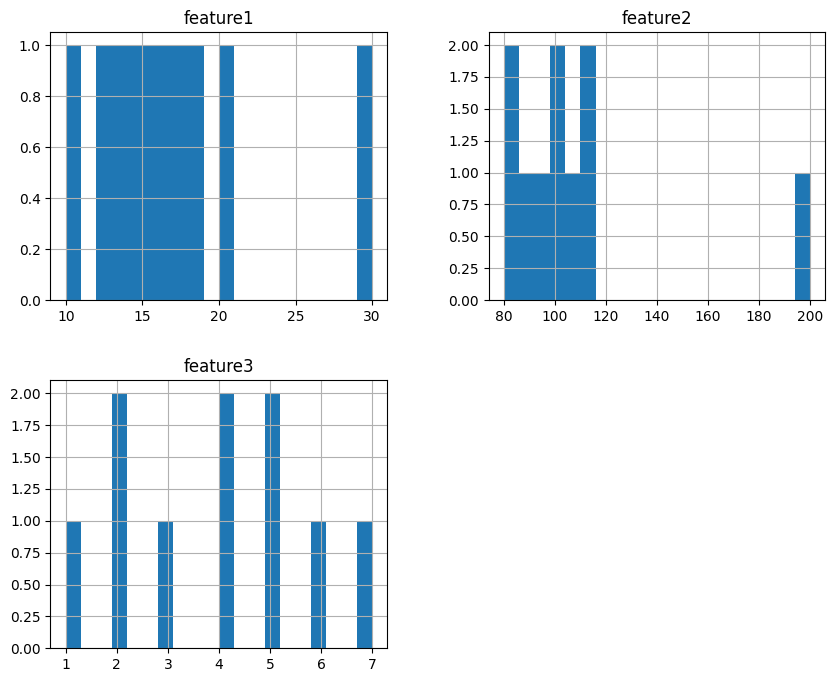

In [43]:
# 수치형 변수 히스토그램 그리기
df.hist(bins=20, figsize=(10, 8))
plt.show()

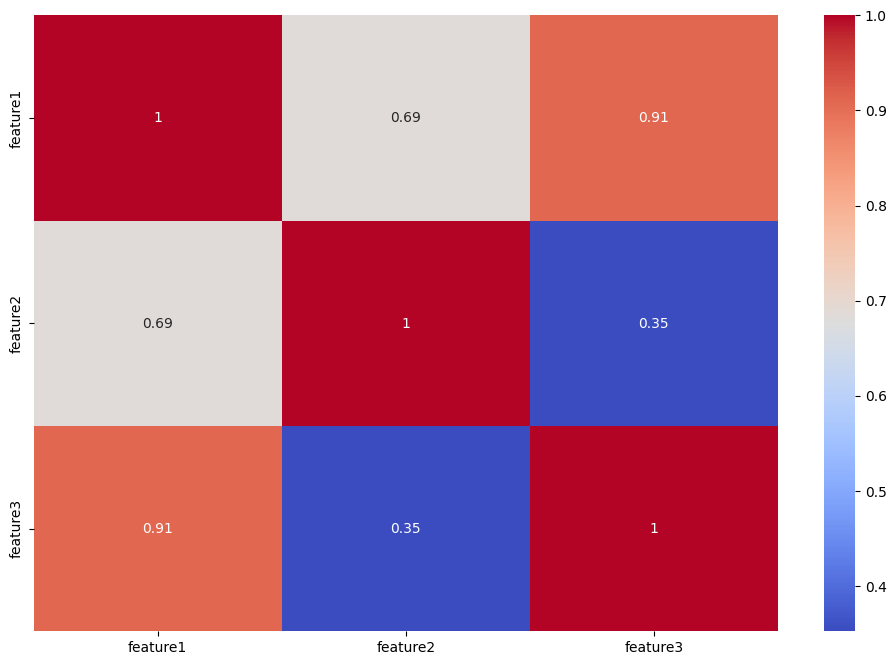

In [44]:
# 상관관계 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


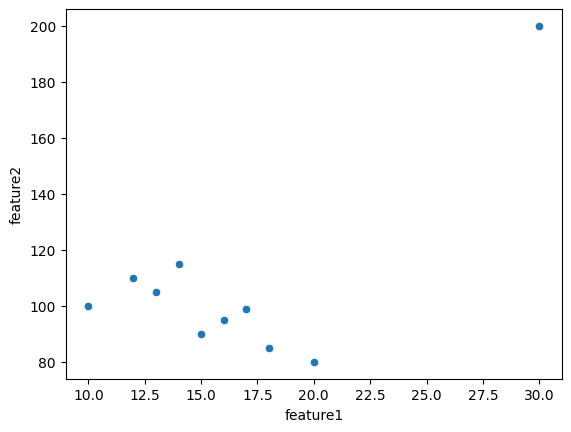

In [45]:
# 상관관계 높은 두 변수 산점도 그리기
sns.scatterplot(x='feature1', y='feature2', data=df)
plt.show()

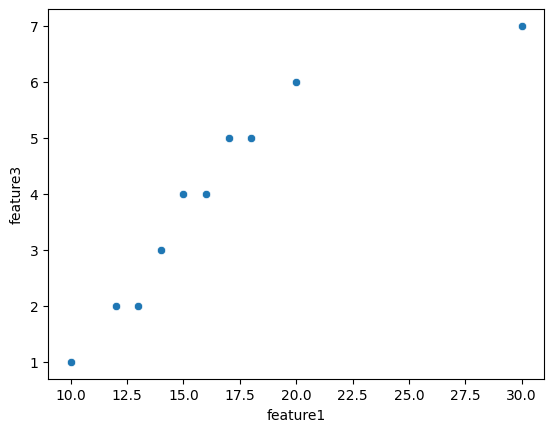

In [47]:
# 상관관계 높은 두 변수 산점도 그리기
sns.scatterplot(x='feature1', y='feature3', data=df)
plt.show()

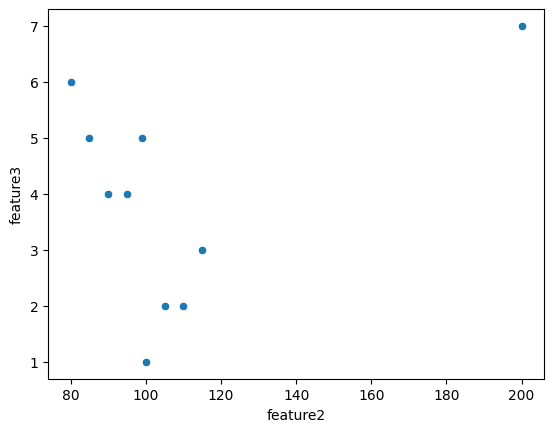

In [48]:
# 상관관계 높은 두 변수 산점도 그리기
sns.scatterplot(x='feature2', y='feature3', data=df)
plt.show()

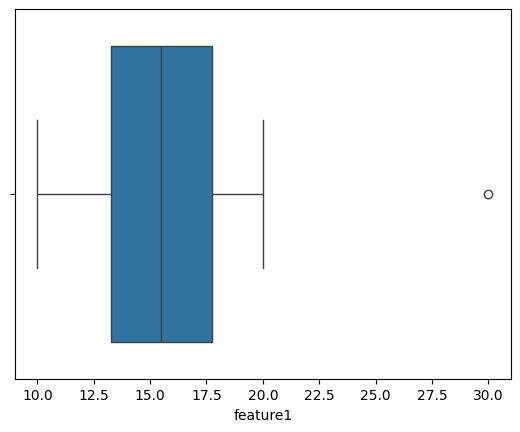

In [46]:
# 박스 플롯을 통한 이상치 탐지
sns.boxplot(x=df['feature1'])
plt.show()

In [71]:
import pandas as pd

df = pd.read_csv('test1_modify7.csv')

df.head()

,year,month,hour,dayofweek,holiday,windforce,discomfort,heat_stroke,regular,casual,group
0,2021,1,0,4,0,0,0,0,298,74.0,1.0
1,2021,1,1,4,0,0,0,0,249,66.0,1.0
2,2021,1,2,4,0,0,0,0,193,53.0,0.0
3,2021,1,3,4,0,0,0,0,153,33.0,2.0
4,2021,1,4,4,0,0,0,0,114,26.0,0.0


In [43]:
Data Exploration
- 방향성과 맞는 그래프를 생성

SyntaxError: invalid syntax (371461749.py, line 1)

In [76]:
import seaborn as sns

<Axes: xlabel='regular', ylabel='casual'>

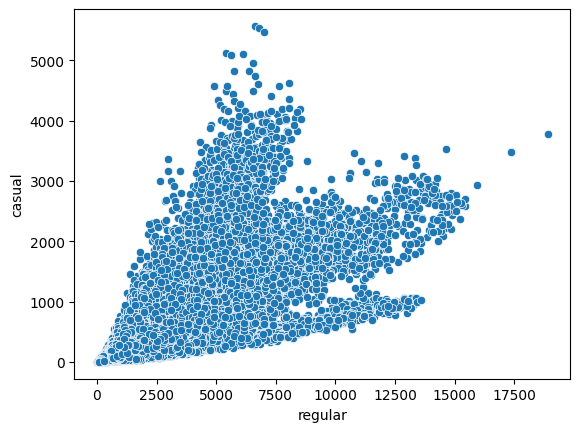

In [77]:
sns.scatterplot(data=df, x='regular', y='casual')

In [78]:
set(df['month'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

<Axes: xlabel='regular', ylabel='casual'>

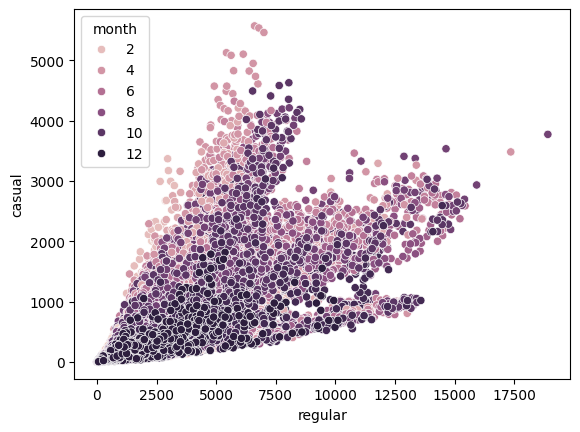

In [79]:
sns.scatterplot(data=df, x='regular', y='casual', hue='month')

<Axes: xlabel='regular', ylabel='casual'>

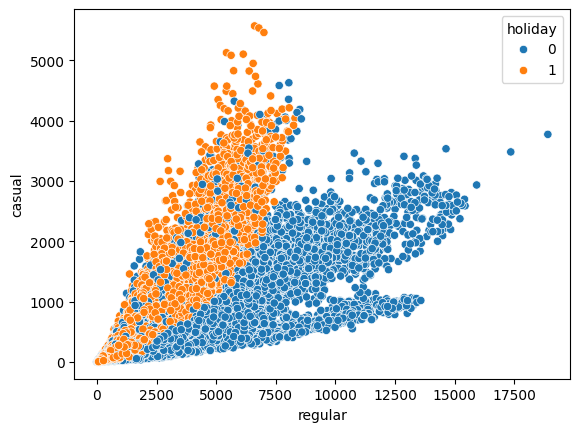

In [80]:
sns.scatterplot(data=df, x='regular', y='casual', hue='holiday')

# 평일에는 등록 회권이 많이 이용하고,
# 휴일에는 비등록 회원이 많이 이용함.
# 등록/비등록 회원의 사용하는 빈도의 차이는 평일과 휴일의 구분임

# 데이터를 표현, 해석하는 그림을 통해 데이터를 잘 표현하는 문장을 도출
# 그림을 해석하는 문장을 도출해 낼수 있어야 하고, 그 문장의 의미가 있어야 함.

In [52]:
set(df['year'])

{2021, 2022, 2023}

In [53]:
import seaborn as sns

<Axes: xlabel='year', ylabel='regular'>

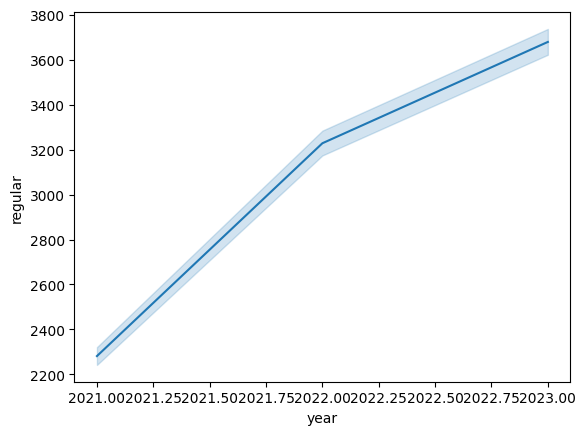

In [82]:
# Q) Lineplot을 활용해 년별 정기 회읜의 이용량 그래프
sns.lineplot(data=df, x='year', y='regular')

<Axes: xlabel='month', ylabel='regular'>

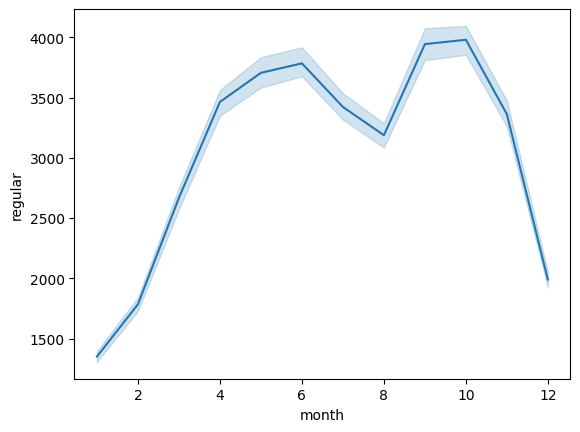

In [83]:
# Q) Lineplot을 활용해 월별 정기 회읜의 이용량 그래프
sns.lineplot(data=df, x='month', y='regular')

<Axes: xlabel='year', ylabel='regular'>

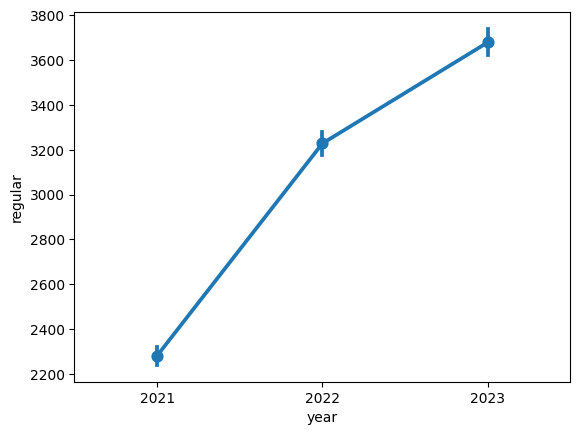

In [84]:
sns.pointplot(data=df, x='year', y='regular')

<Axes: xlabel='month', ylabel='regular'>

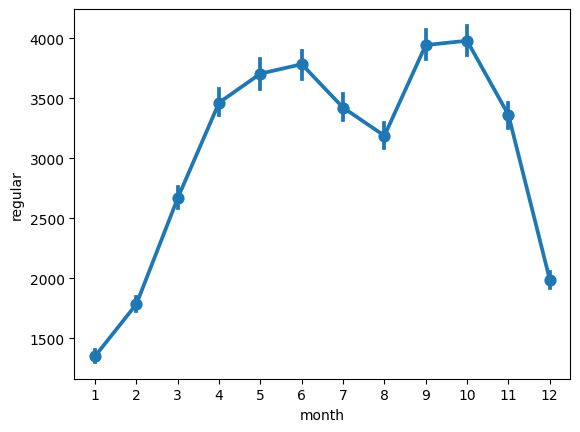

In [85]:
sns.pointplot(data=df, x='month', y='regular')

<Axes: xlabel='month', ylabel='casual'>

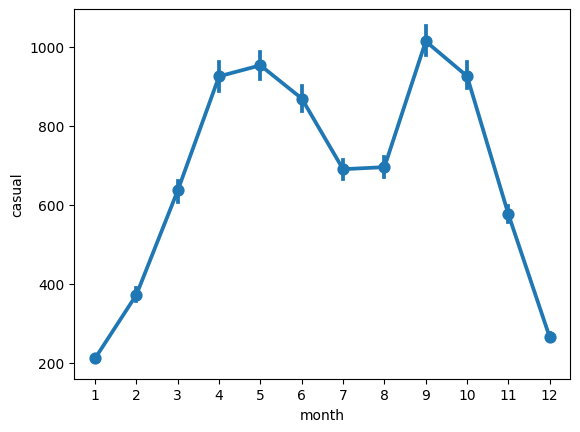

In [86]:
sns.pointplot(data=df, x='month', y='casual')

<Axes: xlabel='hour', ylabel='casual'>

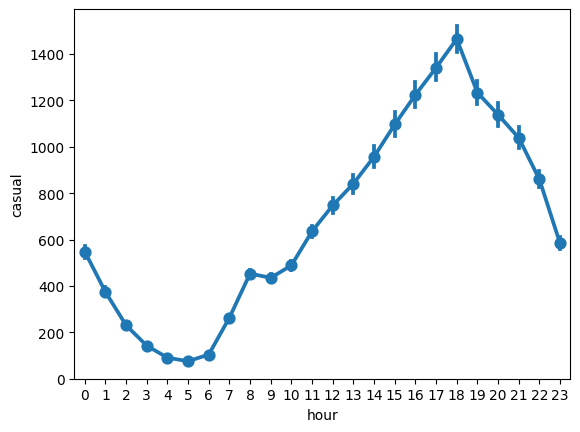

In [87]:
sns.pointplot(data=df, x='hour', y='casual')

In [88]:
import matplotlib.pyplot as plt

<Axes: xlabel='hour', ylabel='casual'>

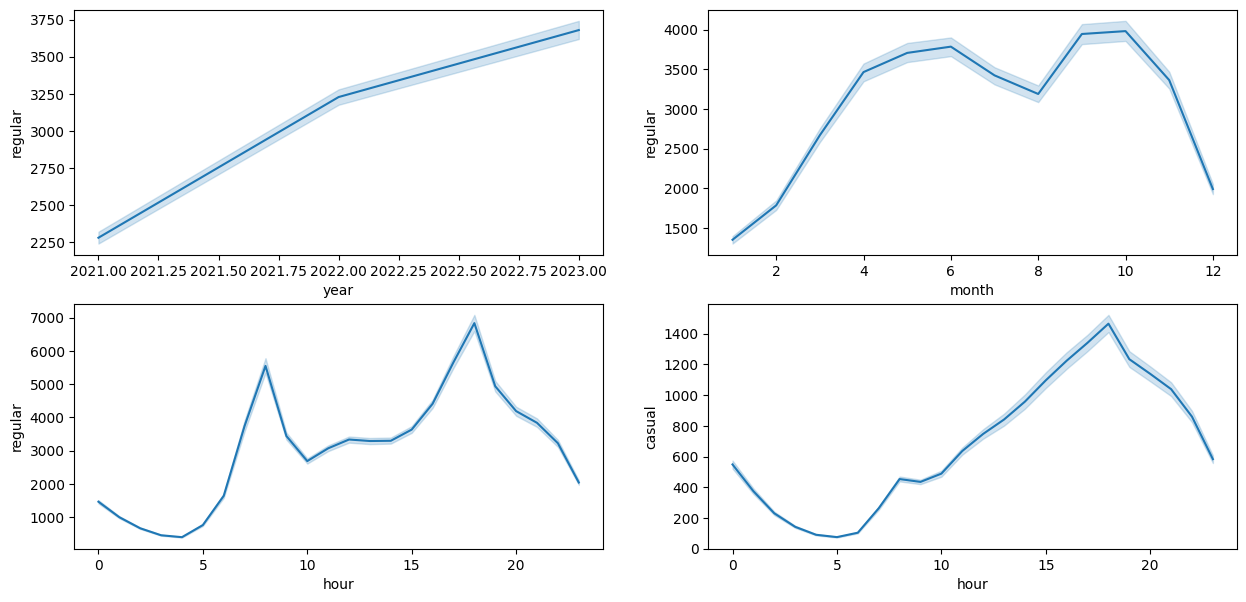

In [89]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(15,7)

sns.lineplot(data=df, x='year', y='regular', ax=ax1)
sns.lineplot(data=df, x='month', y='regular', ax=ax2)
sns.lineplot(data=df, x='hour', y='regular', ax=ax3)
sns.lineplot(data=df, x='hour', y='casual', ax=ax4)

<Axes: xlabel='hour', ylabel='casual'>

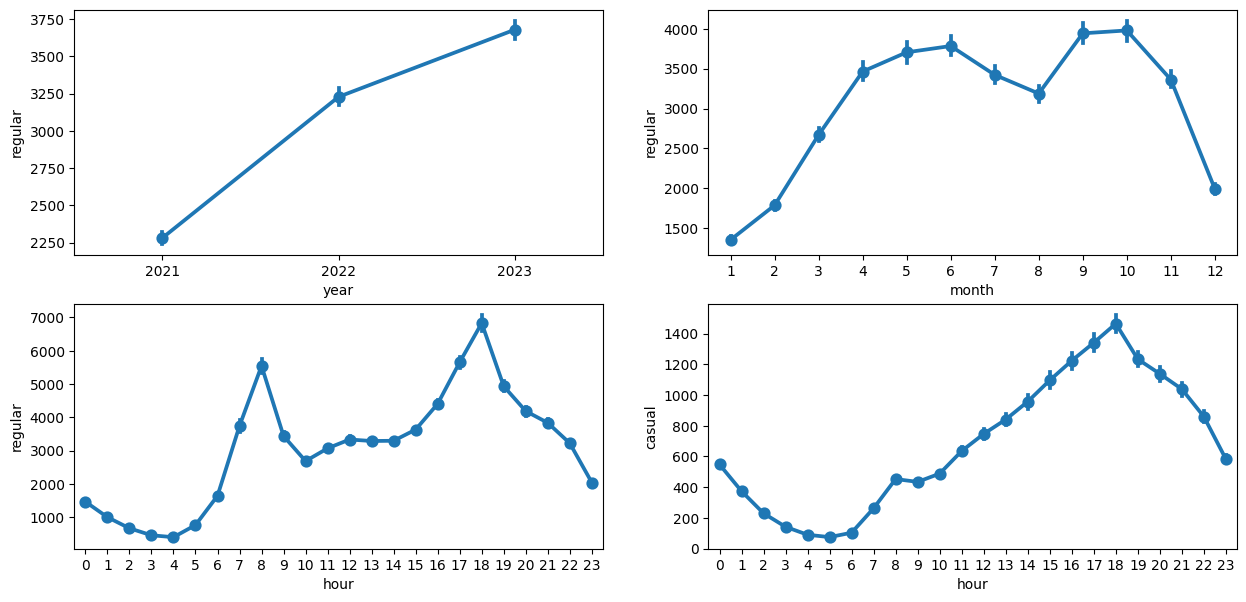

In [90]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(15,7)

sns.pointplot(data=df, x='year', y='regular', ax=ax1)
sns.pointplot(data=df, x='month', y='regular', ax=ax2)
sns.pointplot(data=df, x='hour', y='regular', ax=ax3)
sns.pointplot(data=df, x='hour', y='casual', ax=ax4)

In [91]:
df['weekend'] = 0
df.loc[df['dayofweek'] > 4, 'weekend'] = 1

<Axes: xlabel='regular', ylabel='casual'>

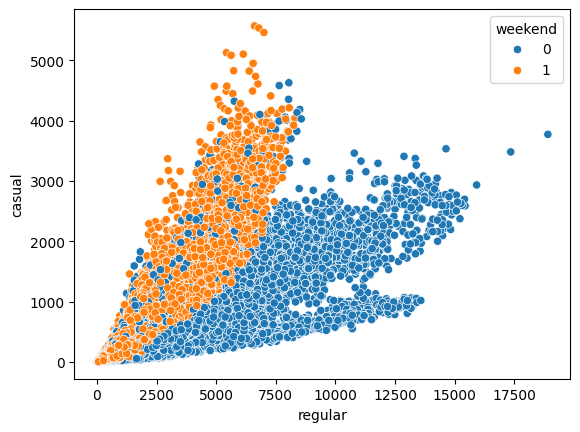

In [93]:
sns.scatterplot(data=df, x='regular', y='casual', hue='weekend')

# 평일에는 등록 회권이 많이 이용하고,
# 휴일에는 비등록 회원이 많이 이용함.
# 등록/비등록 회원의 사용하는 빈도의 차이는 평일과 휴일의 구분임

# 데이터를 표현, 해석하는 그림을 통해 데이터를 잘 표현하는 문장을 도출
# 그림을 해석하는 문장을 도출해 낼수 있어야 하고, 그 문장의 의미가 있어야 함.

<Axes: xlabel='hour', ylabel='casual'>

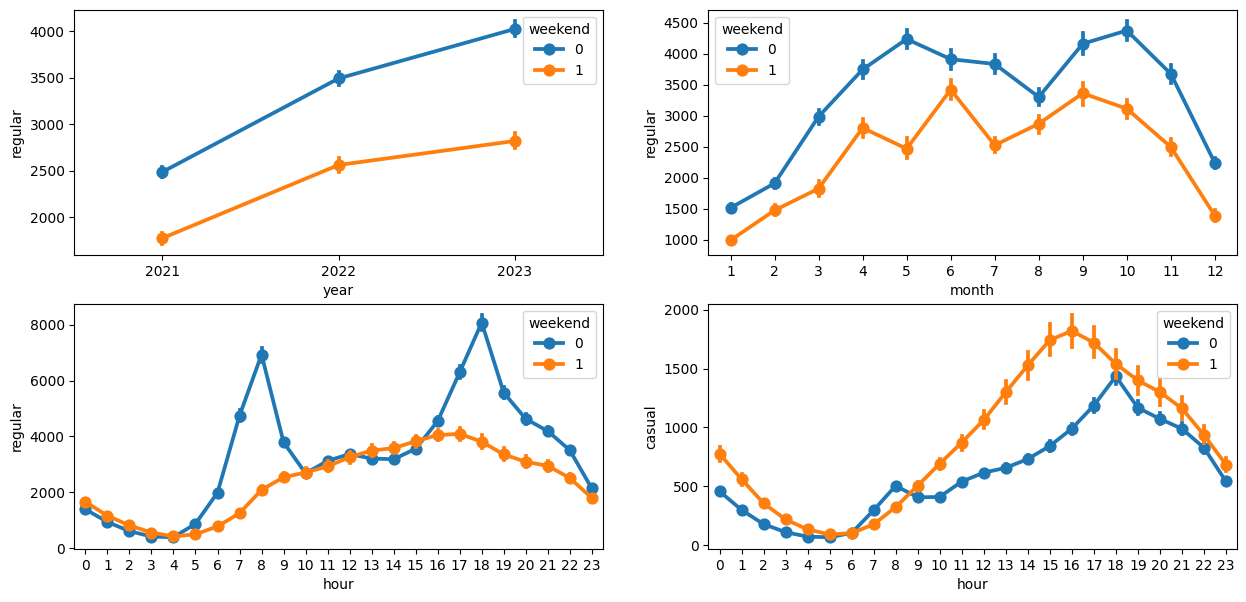

In [63]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(15,7)

sns.pointplot(data=df, x='year', y='regular', ax=ax1, hue='weekend')
sns.pointplot(data=df, x='month', y='regular', ax=ax2, hue='weekend')
sns.pointplot(data=df, x='hour', y='regular', ax=ax3, hue='weekend')
sns.pointplot(data=df, x='hour', y='casual', ax=ax4, hue='weekend')

# hue : 평일, 주말

<Axes: xlabel='hour', ylabel='casual'>

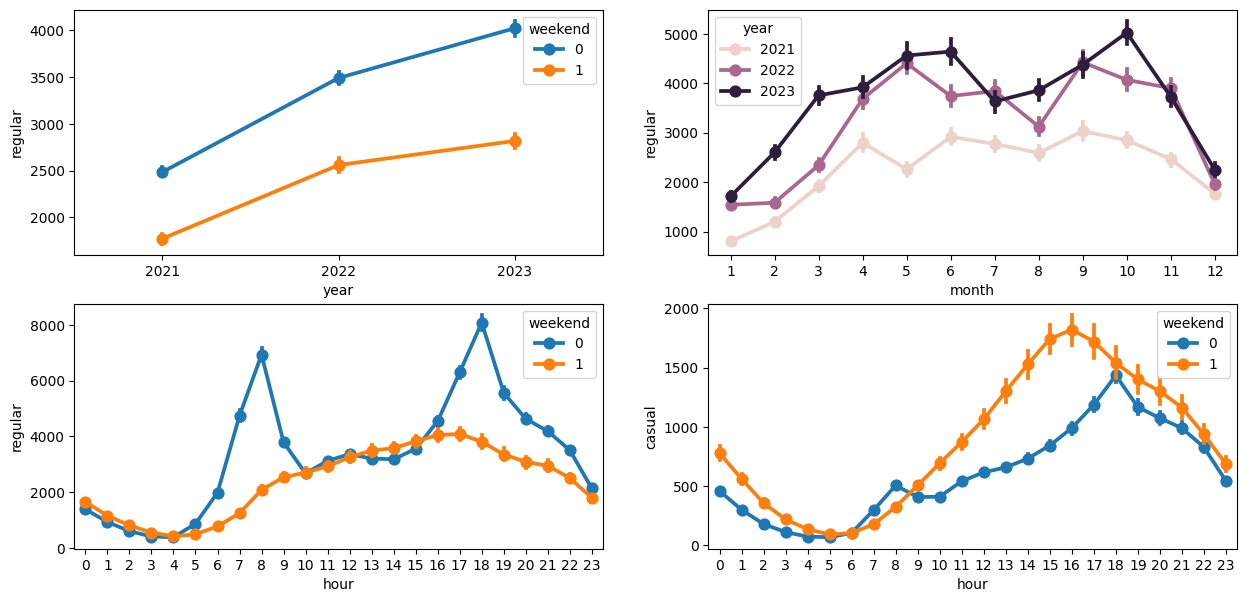

In [64]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(15,7)

sns.pointplot(data=df, x='year', y='regular', ax=ax1, hue='weekend')
sns.pointplot(data=df, x='month', y='regular', ax=ax2, hue='year')
sns.pointplot(data=df, x='hour', y='regular', ax=ax3, hue='weekend')
sns.pointplot(data=df, x='hour', y='casual', ax=ax4, hue='weekend')

# hue : 평일, 주말

#### Data Preparation
- 이상치 탐지 -  MAD 방식  - IQR
- scaling - robust             - minmax, std(표준편차)
- feature selection - PIMP ( 3가지 중요한 방식 : Filter Methods, Wrapper Methods, Embedded Methods)

#### MAD(Median Absolute Deviation) - 차이 median / average 사용 차이
* 중앙값 절대 편차 - 중간값으로 부터 어느 정도 떨어져 있는지 확인


#### 중앙값 절대 편차

MAD(Median Absolute Deviation)는 각 값의 절대값의 중앙값 $(x_i)$에서 $median(x)$의 중앙값을 빼서 계산합니다. <br>
평균 절대 편차(average absolute deviation)와 유사하지만 $평균$ 대신 $중앙값$을 쓴다는 점이 다른다. <br>
$절대 편차$(absolte deviation)의 일종이다.

$MAD = median (| x_i - median(x) |) $

여기서 $(x_i)$

- $(\tilde{x})$는 그룹의 중앙값입니다.

관측값에서 중앙값을 뺀 값들의 중앙값을 구하는 것이다.

편차 값이 테일의 극값의 영향을 적게 받아야 하는 경우 평균 편차 대신 중앙값 절대 편차가 사용됩니다. 중앙값이 평균보다 테일 값의 영향을 적게 받기 때문입니다.


MAD(Median Absolute Deviation)는 통계학 및 머신러닝에서 데이터의 변동성을 측정하는 데 사용되는 지표 중 하나입니다. 특히 데이터가 이상치(outlier)에 민감한 평균과 표준편차 대신, 보다 강건한(robust) 통계량을 사용할 때 유용합니다. MAD는 데이터의 중심으로부터 각 데이터 점이 얼마나 떨어져 있는지를 측정하며, 일반적으로 데이터의 중앙값을 기준으로 측정합니다.

### MAD 계산 방법
- 중앙값 계산: 먼저 데이터 세트의 중앙값(median)을 구합니다.
   - 중앙값은 데이터가 오름차순으로 정렬되었을 때, 그 중간에 위치한 값입니다. 데이터의 개수가 짝수인 경우 두 중앙값의 평균을 사용합니다.
- 절대 편차 계산: 각 데이터 포인트와 중앙값 사이의 절대적인 차이(절대 편차)를 계산합니다.
  - $절대편차 = | x_i - median(x) | $
- 절대 편차의 중앙값 계산: 두 번째 단계에서 구한 절대 편차의 중앙값이 MAD입니다.
  - $MAD = median( | x_i - median(x) | )$

### MAD의 특징
- 강건성(Robustness): MAD는 중앙값을 기준으로 하기 때문에 이상치의 영향을 덜 받습니다. 반면에 평균과 표준편차는 이상치에 매우 민감하므로 이상치가 많은 데이터에서는 MAD가 더 적합할 수 있습니다.

- 스케일링: MAD는 데이터가 평균 중심이 아닌 중앙값 중심으로 얼마나 분산되어 있는지를 보여주기 때문에, 주로 강건한 데이터 분석에 사용됩니다. 이를 표준편차와 비슷하게 해석하려면 일반적으로 MAD에 약 1.4826이라는 상수를 곱해주는 방식으로 표준편차와 비교할 수 있습니다. 이 상수는 정규분포를 가정한 경우에 사용됩니다.

$$ Scaled MAD = 1.4826 × MAD $$

    이는 MAD를 정규 분포와의 비교를 위해 표준편차의 대체 수단으로 사용할 때 적용됩니다.

- 비교 대상: 표준편차가 데이터의 평균으로부터의 분산을 측정하는 데 사용된다면, MAD는 데이터의 중앙값으로부터의 분산을 측정한다고 볼 수 있습니다. 특히 비정상적인 분포나 비대칭 분포가 있는 경우 MAD는 더욱 유용할 수 있습니다.


### MAD의 활용 예시
- 이상치 탐지: 데이터 세트에서 이상치를 식별하는 데 MAD가 유용합니다. 데이터 포인트가 중앙값에서 여러 배의 MAD만큼 떨어져 있는 경우 이상치로 간주할 수 있습니다.
- 강건한 회귀 분석: 회귀 분석에서 MAD는 이상치에 민감한 표준편차 대신 사용될 수 있으며, 이를 통해 모델이 더 안정적으로 학습될 수 있습니다.

<br>
MAD는 평균과 표준편차에 비해 이상치가 많은 데이터 세트에서 더욱 적합한 분산 척도이며, 데이터의 특성에 따라 적절한 통계량을 선택할 때 중요한 대안이 됩니다.

### 상수 0.6745는 (학술적인 값 0.6745)
- MAD (Median Absolute Deviation)**를 표준편차와 비교하기 위해 사용하는 스케일링 상수 중 하나입니다. MAD는 중앙값을 기준으로 변동성을 측정하지만, 이를 정규분포에서의 표준편차와 직접 비교할 수 없기 때문에 보정이 필요합니다. 이때 0.6745라는 상수를 사용하여 MAD를 표준편차와 유사한 방식으로 해석할 수 있습니다.

### 왜 0.6745인가?
0.6745는 **표준 정규분포(평균 0, 표준편차 1)**에서 중앙값과 약 50%의 확률로 관측되는 값 사이의 거리에 해당합니다. 다시 말해, 정규분포에서 약 50%의 데이터가 중앙값에서 ±0.6745의 범위 내에 위치합니다. 이를 활용하여 MAD를 표준편차와 비교할 때 보정해줄 수 있습니다.

### 사용 방법:
데이터가 정규분포를 따른다고 가정할 때, 표준편차 대신 MAD를 사용할 수 있습니다. 하지만 MAD는 중앙값을 기준으로 한 변동성 척도이므로, 이를 표준편차와 동일하게 비교하기 위해 0.6745를 곱해 보정합니다.

### MAD에서 표준편차로 변환:
정규분포를 가정한 MAD와 표준편차 간의 관계는 다음과 같습니다:

$$
\text{표준편차} \approx \frac{\text{MAD}}{0.6745}
$$
 
이를 통해 MAD로부터 대략적인 표준편차 값을 추정할 수 있습니다.

### 요약:
0.6745는 정규분포에서 중앙값과 표준편차의 관계를 반영하는 상수입니다.
이 상수를 통해 MAD를 표준편차와 유사한 척도로 변환하거나 비교할 수 있습니다.
데이터가 정규분포를 따른다고 가정할 때, MAD에 0.6745를 곱하면 표준편차와 비슷한 결과를 얻을 수 있습니다.

0.6745와 1.4826는 모두 **MAD(Median Absolute Deviation)**를 활용할 때 사용되는 상수이지만, 각각의 상수는 다른 목적을 위해 사용됩니다. 이들의 차이점은 다음과 같습니다:

1. 0.6745의 의미
- 목적: MAD를 표준편차와 직접적으로 비교하기 위해 사용하는 상수.
- 설명: 0.6745는 정규분포에서 약 50%의 데이터가 중앙값에서 이 거리를 벗어나지 않는 범위를 나타냅니다. 이 상수를 사용해 MAD를 표준편차와 동일한 척도로 변환할 수 있습니다.
- 사용 방법: 데이터가 정규분포를 따르는 경우, 표준편차를 추정하기 위해 다음 공식을 사용합니다:

$$
\text{표준편차} \approx \frac{\text{MAD}}{0.6745}
$$
 
- 적용: 이를 통해 MAD를 표준편차와 유사하게 해석하고자 할 때 사용됩니다.
    
2. 1.4826의 의미
- 목적: MAD를 정규분포에서의 표준편차로 스케일링하기 위한 상수.
- 설명: 1.4826은 데이터가 정규분포를 따른다고 가정할 때, MAD를 이용해 추정된 변동성을 표준편차와 같은 단위로 맞추기 위한 상수입니다. 이 상수는 MAD에서 정규분포의 표준편차로 변환할 때 사용됩니다.
- 사용 방법: MAD에서 정규분포를 가정한 표준편차로 변환할 때 다음 공식을 사용합니다:
$$
Scaled MAD=1.4826×
$$
- 적용: 이는 주로 이상치(outlier)에 민감하지 않은 표준편차 대용의 변동성 척도를 얻기 위해 사용됩니다.

### 차이점 요약:
- 0.6745는 MAD를 이용하여 표준편차를 직접 계산할 때 사용하는 상수입니다. 이를 통해 MAD로부터 표준편차를 추정합니다.
- 1.4826는 MAD를 표준편차와 동일한 스케일로 변환하는 상수입니다. 즉, MAD를 정규분포의 표준편차와 같은 척도로 맞추기 위해 사용됩니다.

<br>
결과적으로 두 상수는 모두 MAD를 표준편차와 연결하기 위한 보정 상수들이지만, 0.6745는 MAD를 표준편차로 변환하기 위한 반면, 1.4826은 MAD를 정규 분포의 표준편차와 비교할 수 있도록 스케일링하는 상수입니다.

In [37]:
import numpy as np

# 데이터 입력 (이상치 포함)
data = np.array([10, 12, 14, 15, 16, 17, 19, 22, 24, 100])  # 100은 이상치

# 중앙값 계산
median = np.median(data)
print(f"중앙값 (Median): {median}")

# 절대 편차 계산
absolute_deviation = np.abs(data - median)
print(f"절대 편차 (Absolute Deviation): {absolute_deviation}")

# 절대 편차의 중앙값 (MAD) 계산
mad = np.median(absolute_deviation)
print(f"Median Absolute Deviation (MAD): {mad}")

# 스케일된 MAD 계산 (1.4826을 곱함)
scaled_mad = 1.4826 * mad
print(f"Scaled MAD: {scaled_mad}")


중앙값 (Median): 16.5
절대 편차 (Absolute Deviation): [ 6.5  4.5  2.5  1.5  0.5  0.5  2.5  5.5  7.5 83.5]
Median Absolute Deviation (MAD): 3.5
Scaled MAD: 5.1891


이 예제에서 이상치인 100이 포함되어 있음에도 불구하고 MAD는 상대적으로 작게 나타나며, 이는 MAD가 이상치에 덜 민감하다는 점을 보여줍니다.

In [42]:
import numpy as np

In [43]:
med = np.median(df['regular'])
med

2482.0

In [44]:
med_dist = np.abs(df['regular'] - med)
med_dist

0        2184.0
1        2233.0
2        2289.0
3        2329.0
4        2368.0
          ...  
27628    1145.0
27629    1199.0
27630    1340.0
27631    1568.0
27632    1568.0
Name: regular, Length: 27633, dtype: float64

In [45]:
MAD = np.median(med_dist)
MAD

1749.0

In [46]:
modified =  0.6745 * med_dist / MAD   # 학술적인 값 0.6745
modified

0        0.842257
1        0.861154
2        0.882750
3        0.898176
4        0.913217
           ...   
27628    0.441568
27629    0.462393
27630    0.516770
27631    0.604698
27632    0.604698
Name: regular, Length: 27633, dtype: float64

In [47]:
# 3.5 이상 값 = 이상치
df.loc[modified >= 3.5]

,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,regular,casual,group,weekend,regular_plus,regular_rob,regular_std
2909,2021,4,8,1,0,0,0,13074,876.0,4.0,0,10592.0,2.890041,4.015115
2936,2021,4,8,2,0,0,0,13008,806.0,4.0,0,10526.0,2.872033,3.990097
2945,2021,4,17,2,0,0,0,12970,2624.0,58.0,0,10488.0,2.861664,3.975692
2946,2021,4,18,2,0,0,0,17348,3482.0,38.0,0,14866.0,4.056207,5.635263
6150,2021,9,8,3,0,0,0,13256,936.0,4.0,0,10774.0,2.939700,4.084106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26142,2023,11,17,3,0,0,0,12010,2259.0,0.0,0,9528.0,2.599727,3.611784
26143,2023,11,18,3,0,0,0,14475,2592.0,0.0,0,11993.0,3.272306,4.546193
26156,2023,11,8,4,0,0,0,13020,1017.0,0.0,0,10538.0,2.875307,3.994646
26303,2023,11,18,2,0,0,0,12225,1530.0,0.0,0,9743.0,2.658390,3.693285


#### scailing 

min max : 이상치의 영향을 많이 받음
std : 이상치 영향을 적게 받음.

In [48]:
df.describe()

,year,month,hour,dayofweek,windforce,discomfort,heat_stroke,regular,casual,group,weekend,regular_plus,regular_rob,regular_std
count,27633.000000,27633.000000,27633.000000,27633.000000,27633.000000,27633.000000,27633.000000,27633.000000,27633.000000,27633.000000,27633.000000,27633.000000,27633.000000,27633.000000
mean,2022.001013,6.545905,11.488040,2.991387,0.013896,0.234756,0.142873,3063.757500,679.889010,12.312851,0.285058,581.757500,0.158733,0.220527
std,0.816200,3.432248,6.903804,2.003796,0.117063,0.466919,0.452185,2638.078986,722.452298,26.169230,0.451450,2638.078986,0.719803,1.000018
min,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-2480.000000,-0.676671,-0.940095
25%,2021.000000,4.000000,6.000000,1.000000,0.000000,0.000000,0.000000,866.000000,141.000000,0.000000,0.000000,-1616.000000,-0.440928,-0.612578
50%,2022.000000,7.000000,11.000000,3.000000,0.000000,0.000000,0.000000,2482.000000,440.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2023.000000,10.000000,17.000000,5.000000,0.000000,0.000000,0.000000,4531.000000,970.000000,12.000000,1.000000,2049.000000,0.559072,0.776716
max,2023.000000,12.000000,23.000000,6.000000,1.000000,2.000000,3.000000,18903.000000,5571.000000,320.000000,1.000000,16421.000000,4.480491,6.224718


In [49]:
df['regular_plus'] = df['regular'] + 1
df[['regular_plus', 'regular']].describe()

,regular_plus,regular
count,27633.000000,27633.000000
mean,3064.757500,3063.757500
std,2638.078986,2638.078986
min,3.000000,2.000000
25%,867.000000,866.000000
50%,2483.000000,2482.000000
75%,4532.000000,4531.000000
max,18904.000000,18903.000000


In [50]:
df['regular_plus'] = df['regular'] - np.median(df['regular'])
df[['regular_plus', 'regular']].describe()

,regular_plus,regular
count,27633.000000,27633.000000
mean,581.757500,3063.757500
std,2638.078986,2638.078986
min,-2480.000000,2.000000
25%,-1616.000000,866.000000
50%,0.000000,2482.000000
75%,2049.000000,4531.000000
max,16421.000000,18903.000000


In [51]:
# robust : median(0), IQR(1)  - IQR(1) = 25% + 75% 더한값.

IQR_val = 4531.0 - 866.0

df['regular_rob'] = (df['regular'] - np.median(df['regular'])) / IQR_val
df['regular_std'] = (df['regular'] - np.median(df['regular'])) / np.std(df['regular'])
interested = ['regular', 'regular_rob', 'regular_std']
# 
df[interested].describe()

# standard  : 해석력으 좋음
# robust : 이상치를 고려했을때 사용

,regular,regular_rob,regular_std
count,27633.000000,27633.000000,27633.000000
mean,3063.757500,0.158733,0.220527
std,2638.078986,0.719803,1.000018
min,2.000000,-0.676671,-0.940095
25%,866.000000,-0.440928,-0.612578
50%,2482.000000,0.000000,0.000000
75%,4531.000000,0.559072,0.776716
max,18903.000000,4.480491,6.224718


In [52]:
df.columns

Index(['year', 'month', 'hour', 'dayofweek', 'windforce', 'discomfort',
       'heat_stroke', 'regular', 'casual', 'group', 'weekend', 'regular_plus',
       'regular_rob', 'regular_std'],
      dtype='object')

In [53]:
interested = ['year', 'month', 'hour', 'dayofweek', 'windforce', 'discomfort', 'heat_stroke', 'regular', 'casual', 'group', 'weekend', 'regular_plus',
       'regular_rob', 'regular_std']
df[interested].to_csv("test1_modify8.csv", index=False)

#### feature selection - PIMP
- Permutation Importance (순열 중요도)  : 데이터 쌓이는 순서가 중요함.

- 순서 있는 데이터와  suffle한 데이터를 비교함.  0.9, 0.5 차이면 데이터는 의미가 없다고 판단함. 주식의 시간 정보를 없애면 가격은 의미 없음
- 순서를 바꾸전 데이터와 바꾼 후의 데이터가 별 차이가 없다면 중요하지 않은 column 임
- 주식을 를 들면
- 즉, 시계열 데이터가 중요한 의미를 가지고 있는 것임.   

# 대표적인 3가지  특성 선택 기술 (Feature Selection)

## 필터 방법 (Filter Methods)
필터 방법은 특성 간의 상관관계를 고려하여 특성을 선택하는 기술이다. 이 방법을 수행하기 위해서 Pearson 상관 계수를 통해 각 특성 간에 상관계수를 참고하기도 하고, 카이제곱 검정과 같은 통계적 방법을 통해 변수 간에 영향도가 적은 것을 검정해서 탈락시킬 특성을 고르기도 한다.

사용될 수 있는 분야 및 예시는 아래와 같다. 

* 생물 정보학: 유방암 데이터세트에서 특정 특성을 선택하여 신규 환자의 종양 조직 검사 결과에 대해 종양의 악성 여부 예측
* 금융 분석: 대출 승인에 영향을 미치는 주요 특성을 식별해서 신용 위험을 평가하고 대출 승인의 리스크를 낮춤
* 자연어 처리: 문서 분류에서 주요한 단어나 구절을 선택하여 문서의 주제를 효과적으로 식별함

## 래퍼 방법 (Wrapper Methods)
 

래퍼 방법은 모델의 성능을 기반으로 특성을 선택하는 기술이다. 재귀적 특성 제거(Recursive Feature Elimination)나 전진/후진 특성 선택(Forward/Backward Feature Selection)과 같은 방법이 있다. 

이러한 래퍼 방법은 필터 방법보다 더 정확한 특성 선택을 제공할 수 있다. 왜냐하면, 래퍼 방법은 모델의 성능을 고려하여 특성을 평가하므로 특성 간의 상호작용이 고려되기 때문이다.

사용될 수 있는 분야 및 예시는 아래와 같다.  

* 자연어 처리: 텍스트 분류  또는 정보 검색과 같은 작업에서 유용한 특성을 선택하여 모델의 효율성을 올려줌
* 카드 부정 거래 탐지: 고객의 거래 패턴을 분석하여 부정 거래를 식별하는 데 중요한 특성을 선택함

## 임베디드 방법 (Embedded Methods)

임베디드 방법은 말 그대로 모델 자체에 포함된 특성 선택 기능이다. LASSO나 Ridge 회귀와 같은 알고리즘을 사용하면 특성 선택 기능이 포함된 상태로 모델링이 되며, 이게 임베디드 방법이 된다. 이런 알고리즘을 써서 임베디드 방법이 수행되면 당연히, 모델의 복잡도가 줄어들고, 성능을 향상하는데 도움이 된다. 

사용될 수 있는 분야 및 예시는 아래와 같다.  

* 이미지 처리: 합성곱 신경망(CNN)을 사용하여 이미지 데이터에서 중요한 특성을 추출
* 텍스트 마이닝: 환 신경망(RNN)을 사용하여 문장에서 중요한 단어를 추출

# 데이터와 관련된 이슈들
 
## 1. 데이터 부재

분석은 하고 싶으나, 데이터 자체가 없을 수 있다. 이럴 때는 어떻게 하는게 합리적인 방법일까? 

* 솔루션1) 우선 시간과 자원이 허락되는 내에서, 작은 범위의 데이터라도 수집하여 분석해 본다. 그러면서 동시에 더 많은 데이터를 수집할 수 있는 추가 시간을 요청한다. 
* 솔루션2) 만약 전혀 시간이 없는 상황이라면, 유사한 대체 데이터를 찾아서 분석한다.
* 
## 2. 데이터 부족

데이터가 있기는 있는데, 부족하다.  나는 리트리버에 대한 데이터가 필요한데, 리트리버에 대한 데이터가 너무 부족하다. 

* 솔루션3) 그럴 땐 임시로 라브라도에 대한 데이터도 합쳐서 본다. 하지만 주의해야 한다. 섞인 데이터로 인해서 실제와는 다른 분석 결과가 나올 수도 있기 때문이다.
* 솔루션4) 그리고 가끔은 그냥 없는 부분은 없는 채로 두는게 더 나을 수도 있다. 성인 남성에 대한 데이터가 필요한데, 18-24세 성인 남성에 대한 데이터가 없을 수 있다. 그럴 땐 그냥 25세 이상만 분석하고 분석이 25세 이상 남성에 한정된 것임을 밝힌다.

## 3. 데이터 오류

충분한 양의 데이터를 확보했다고 좋아했는데, 막상 분석을 해보려고 하니 데이터에 오류가 너무 많을 수 있다. 부품번호 항목에 온갖 실수로 입력되었을 것 같은 텍스트들이 잔뜩 있다. 그러면 데이터베이스 관리를 엉망으로 한 사람에 대한 불만이 나올 수 있다.  원인이 여러 가지일 수 있지만, 불만만 늘어놓는 건 하나도 도움이 되지 않는다.

* 솔루션5) 혹시 데이터를 제공해준 곳에서 요청사항을 잘못 이해하지는 않았는지 확인해보고 다시 연락해 본다. 
* 솔루션6) 그럴 수 없는 상황이라면, 수작업으로 데이터를 손 볼 수 있는지 알아본다. 가능하다면 데이터 클리닝을 한다. 어떤 특정한 패턴이 있다면 조금 더 수월하게 수정할 수 있을 것이다. 
* 솔루션7) 만약 데이터 사이즈가 충분히 크고, 오류가 있는 부분이 무시할만한 정도라면, 과감하게 그 부분을 빼버린다. 

여기서 중요한게 있다. 어떻게든 방법이 있기 마련이니, 아무것도 하지 않고 있지만 말자. 그리고 끊임없이 관련부서나 상급자/의뢰 부서/의뢰 회사와 소통하는 것도 잊지 말자.

### 흔한 데이터 오류 유형들

* 데이터 소스 에러: 툴, 프로그램, 또는 그 안에서 사용한 함수들이 애초에 잘못되어 있는 경우
* Null Data (NA): 누락 등의 이유로 발생하는 Null 또는 Not Available 데이터
* 오타: 오타 안 만드는 인간은 없다.
* 텍스트 앞뒤의 스페이스
* 중복
* 대소문자 혼용으로 인한 필터 누락
* 포맷 불일치로 인한 필터 누락
* 일부가 잘려 나간 값들

어떤 데이터 문제가 있고, 어떻게 방향을 잡아야 하는지에 대해 대략적으로 알아 보았다. 이는 데이터 정제 또는 데이터 클리닝(Data Cleaning)이라는 작업을 위함이다. 다음 글에서는 데이터 클리닝에 대해서 알아 보자

# 데이터 분석의 6 단계

제목만 보고 벌써 지루해졌을지도 모르겠다. 하지만 그냥 그렇구나 정도로 쉽게 훑어보면서 넘어가자. 읽고 나면 이미 여러 번 해 봤던 과정일 수도 있다. <br>

구글에서 정의하고 있는 데이터 분석의 6단계는 다음과 같다. <br>

1. 문제제기 (Ask)
2. 준비 (Prepare)
3. 처리 (Process)
4. 분석 (Analyze)
5. 공유 (Share)
6. 실행 (Act)

이름을 잘 붙여 놓았지만, 결국 문제나 목적이 있었기 때문에 데이터 준비해서 분석했고, 분석 결과를 누군가와 공유한 후에 잘했는지 못했는지 봤다는 얘기다. 여러 웹사이트를 돌아다니다 보면 일부 단계가 합쳐져 있거나 이름이 다를 수 있지만, 결국 큰 흐름에서는 별 차이가 없다.

이제 각 단계에 대해서 추가 설명을 해보자. 

#### 1. 문제제기 (Ask)
구글로 시작했으니, 구글에서 말하는 문제제기에 대한 설명을 더해보자. 

* 해결하고자 하는 문제를 정의한다.
* 문제와 관련된 이해당사자들이 기대하는 바를 완전히 이해하라. 이를 위해서 그들과 지속적으로 소통하고 협업한다.
* 실질적인 문제에 집중하고, 그 외의 것들은 과감하게 버린다.
* 문제 자체에 매몰되지 말고, 한 걸음 뒤로 물러나서 전체적인 맥락을 본다. 
  
적절한 질문을 할 줄 알아야 그 다음 단계로 넘어갈 수 있다. 회사 생활을 하면서 여러 직원들과 일을 해보았다. 일을 잘하는 직원과 그렇지 않은 직원은 안타깝게도 '문제정의'에서부터 차이가 난다. 동일한 문제를 놓고도 헛다리를 짚어 생각지도 못한 구석에서 끙끙거리고 있는 사람들이 한 둘이 아니다. 그러니, 당연한 이야기이지만 문제제기가 제일 중요한 단계이다. 요즘같이 언제든지 스마트폰으로 인터넷에 접속할 수 있는 세상에서는 깊이 생각하는 훈련이 모두에게 부족하다. 이와 관련하여 조훈현의 『고수의 생각법』을 읽어보길 추천한다. <br>

#### 2. 준비 (Prepare)
문제는 알았으니 어떤 데이터를 모아야 하는지 결정해야 한다. 대부분의 경우 데이터는 한가지가 아니고 여러 출처에서 나온 다양한 형태를 띄고 있을 것이다. 준비 단계에서는 다음과 같은 고민을 하고 수집된 데이터를 잘 정리해야 한다. <br>

* 문제를 해결하기 위해 어떤 데이터를 어디에서 가지고 올 것인가
* 기존에 존재하는 데이터가 없다면, 어떤 방법을 통해 추가로 데이터를 확보할 것인가
* 확보된 데이터에서 어떤 값을 측정할 것인가
* 수집된 데이터를 어디에 어떻게 저장할 것인가
* 저장된 데이터를 어떻게 안전하게 관리할 것인가
 
#### 3. 처리 (Process)
전처리라고 하면 더 와닿겠다. 이 단계에서는 실질적인 분석을 하기 전에 데이터를 가다듬는다(Clean-up). 회사의 데이터베이스에 있는 데이터이든, 공공데이터(Public Data)이든, 아니면 어떤 다른 형태의 대안데이터(Alternative Data)이든 현실 세계에서의 데이터는 대부분 불완전하다. 즉, 에러가 많이 있고, 같은 종류의 데이터에도 엉뚱한 값이 들어가 있거나 서식이 다를 수 있고, 비어 있는 값이 있을 수 있다. 그 상태에서 그대로 데이터 분석을 하면 가끔 실제와 다른 엉뚱한 결과가 나오게 되므로 전처리 과정은 필수이다. 경험이 별게 아닐 수 있지만, 경험이 있는 사수와 신입의 차이는 여기에서도 생긴다. 노련한 사람은 각 출처에서 나온 데이터에서 어디를 손봐줘야 할지 쉽게 알아차릴 수 있다. 하지만 경험이 부족한 사람의 경우 전처리에서 애를 먹는다. 다음 단계인 분석의 단계를 거쳐야 뭔가 잘못되었다는 걸 알아차리고 다시 뒤로 넘어와 데이터를 다듬다보면, 어느 새 사무실에 혼자 있는 자신을 발견하게 된다. 


* 엑셀을 사용하고 있다면, 필터 등 기본기능을 사용하여 잘못 입력된 데이터를 찾아낸다. <br>
동일한 항목이 중복되어 있는지, 각 항목별 이상한 값이 들어가 있는지, 입력된 값에 스페이스가 있는지, 'N/A'가 있는지 등등
* SQL을 사용할 수 있다면 더 큰 사이즈의 데이터를 수정할 수 있다.
* 데이터 자체에 편향(Bias)이 있지 않은지 한 번 더 살펴본다.
* 
데이터는 특정 의견이 반영되지 않은 순수한 Raw Data이어야 하고, 입력된 값들은 항목별로 통일성이 있어야 한다. 수집된 데이터의 어디를 손봐야 하는지 아는 것도 중요하지만, 문제점을 발견한 후에 어떻게 효율적으로 처리해야 하는가도 중요하므로 많은 연습이 필요하다. 

#### 4. 분석 (Analyze)
실질적으로 데이터를 가지고 이리저리 돌려보며 인사이트를 찾아내는 단계이다. 데이터를 정렬하고, 원하는 형태로 만든다. 

* 주어진 데이터로 어떻게 성과 측정을 위한 계산을 고안해 낼 것인가
* 여러 데이터들을 어떻게 합쳐낼 것인가
* 분석된 결과물은 어떤 형태로 정리될 수 있는가

인사이트를 찾아내는 방법은 다양할 수 있다. 사람마다 차이가 있을 수도 있고, 상황에 따라 다를 수도 있다. 어떤 경우에는 'A-ha Moment'가 와서 유레카를 외칠 수도 있고, 어떨 때에는 내가 이 데이터를 가지고 어떤 얘기를 하고 싶은지 깊이 묵상할 때 얻기도 한다. 

 

#### 5. 공유 (Share)
분석된 결과가 종종 한 사람의 머릿 속을 떠나지 않을 때가 있다. 임팩트가 있어서가 아니다. 그 사람 말고는 이해를 못해서이다. 공유의 단계에서는 그걸 어떻게 효과적으로 다른 사람의 머리로 전달할지를 고민하는 단계이다. 

* 어떻게 보여줘야 이해당사자들이 쉽게 이해할 것인가
* 어떻게 보여줘야 본 사람들이 더 나은 의사결정을 할 수 있을까
* 결론을 어떻게 강조하면 좋은가

5~6쪽짜리 워드 파일을 작성해서 보여줘야 할 때도, 1장짜리 훈민정음 요약본을 작성해야 할 때도, 다양한 형태의 파워포인트로 전달해야 할 때도 있지만, 결국은 '어떻게 보여줘야 하는가'에 대한 고민이다. 단순하게 빽빽한 글로만 전달하고자 한다면 의도한 바가 이루어지지 않을 수 있다. 인간은 기본적으로 자기애가 넘친다. '나의 시간'이 침해받는 걸 무척 싫어한다. 특히 그런 상황에 대해서 불만을 쉽게 얘기할 수 있는 윗 분들의 경우에는 더더욱 그렇다. 그러니 적절한 표와 그래프는 필수이다. 단순히 엑셀에서 제공하는 차트 기능을 사용해도 되지만, 타블로(Tableau), MS Power BI, Looker 등의 전문 Visualization Tool을 배워보자. 또는 Python이나 R에서 제공하는 Package를 사용해도 된다. 단순하게 화려하기만 하면 안된다. 언제나 스토리텔링의 선 상에 있어야 한다. 관심이 있는 사람은 원서인 『Storytelling with Data』를 읽어보기 바란다. 


#### 6. 실행 (Act)
분석된 결과를 그 분들께 보고했으니, '그래서 어쩌라고?'라는 질문이 나올 차례다. '이렇게 하시면 됩니다'라는 내용을 제시해주는 단계가 '실행'단계이다. '데이터에 의한 의사결정(Data-driven Decision)'이 이런 것입니다라고 멋있게 보여주자. 

 
생각보다 설명이 길어졌다. 하지만 다 읽고서 알았겠지만 이미 하고 있는 것들이다. 그냥 어디가서 "데이터 분석에는 6단계의 과정이 있습니다"라고 말하고 싶다면 신경써서 보고, 아니면 그냥 넘어가도 된다. 

# 데이터 분석 1단계: 문제제기 (Ask) - 질문에 대하여

## 질문의 중요성
데이터 분석을 하기 전 원론적인 얘기를 더 길게 해 보겠다.

현업에서의 전문 지식을 축적한 사람은 확실히 같은 데이터를 보더라도 어떤 질문이 필요한지, 어떤 것부터 우선되어야 하는지 등을 다른 사람들에 비해 쉽게 알아낼 수 있다. 그렇기 때문에 처음으로 데이터의 세계에 입문하는 사람들의 경우, 본인이 몸 담고 있는 영역의 지식(도메인 지식)을 활용한 데이터 분석부터 시작할 것을 추천한다. 코딩 실력도 좋지만, 본인의 강점을 더 잘 활용하라는 말이다. 

데이터 분석 관련 책을 보면 역시나 이론으로 시작해서 코딩은 뒤에 나온다. 데이터가 아니라 경영학 과목 어딘가에 나올 것 같은 얘기들이 초입에 장황하게 나와있다. 학문적으로 전문성 있는 책처럼 보이기 위함이 아니다. 스킬을 배우기 전 밑작업이다. 위에서도 설명했지만, 이런 지식들이 없으면 똑같은 데이터를 보았지만 필요한 정보를 뽑아내지 못할 수 있다. 헛다리를 짚어 엉뚱한 말을 하는 사태가 벌어지기도 한다. 따라서 되도록이면 지루하더라도 넘겨버리지 않기를 추천한다. 

다시 한 번 강조하지만 어떤 질문을 하느냐에 따라 전체 데이터 분석이 산으로 갈 수도 있다. 따라서 시작 단계부터 많은 관심을 기울여야 한다. 개인적으로도 매번 데이터 분석 업무에 앞서 '질문 목록'을 작성하다. 최종 보고서의 목차 역할을 하는 각 주제 영역을 나누고, 각각에 대한 질문 목록을 작성하여 필요한 단계를 분석하면 더 체계적이고 빠지는 부분없이 입체적인 결과를 얻기 쉬워진다.

## 내부용 질문과 외부용 질문
  
위에서 말한 '질문 목록'은 데이터 분석의 초안을 잡기 위한 질문에 대한 설명이다. 하지만 현실에서의 데이터 분석은 대부분 전사적인 과제이거나, 외부 업체로부터의 의뢰로 시작된다. 즉, 업무 파악도 제대로 안되어 있을 수 있고, 데이터 자체도 생전 처음보는 데이터일 수도 있다. 가끔은 어디서부터 손을 대야 할지 감조차 오지 않을 수 있다. 이럴 때에는 초안으로 작성된 '질문 목록'에 '외부용 질문'을 추가해야 한다. 하지만 본질적으로는 분석을 위한 정확한 대상 파악이라는 틀에서는 같은 질문으로 봐도 무방하다.

<img src="내부용_외부용_질문.png">

## 질문은 어떻게 해야 하는가? 어떤 질문을 만들어야 하는가 ?

질문을 하기 전에 다시 한 번 점검해보자. 누구하고 얘기를 하고 있는지, 관련 분야를 고려 시, 내가 하려는 질문이 SMART한 질문인지 등을 생각해보자. SMART한 질문은 어디선가 많이 들어봤을 것이다. SMART는 목표를 설정하는 가장 널리 알려진 방법이다. 구체적이고(Specific), 측정가능하며(Measurable), 의뢰 가능하며(Assignable), 현실적이며(Realistic), 시한을 정한(Time-limited) 목표를 세워야 한다는 건데, 질문을 위한 SMART는 조금 다르다. 

* Specific (구체적인 질문): 단순하며, 핵심을 찌르는 한 두가지 정도에 초점을 맞춘 구체적인 질문
* Measurable(측정 가능한 질문): 정량적이고 측정 및 평가가 가능한 답을 구하는 질문
* Action-Oriented(행동지향적인 질문): 특정한 변화를 의도하고, 구체적인 실행을 유도하는 질문
* Relevant (연관성이 있는 질문): 해결하고자 하는 문제와 연관성이 깊은 질문
* Time-Bound (시점을 특정할 수 있는 질문): 분석하고자 하는 주제관련 데이터의 기간을 특정할 수 있는 질문
  
질문 하나하나가 각 항목들 전체를 만족하기는 쉽지 않지만, '질문 목록'의 질문들이 위의 SMART를 골고루 고려하였다면 분석작업 시작을 위한 방향은 잘 잡혔다고 보면된다.

# 데이터 분석 1단계: 문제제기 (Ask) - 외부팀과의 협업

구멍가게가 아닌 이상, 대부분의 분석 업무는 타부서 또는 타회사와의 협업이 필수이다. '데이터 분석 1단계: 문제제기 (Ask) - 질문에 대하여 외부용 질문에 대해 잠깐 언급하였다. 이번 글에서는 그 내용을 좀 더 자세하게 설명하겠다. 외부팀과의 협업을 위해서 어떤 점들을 주의해야 할까?

## 효과적인 커뮤니케이션을 위한 고려사항

커뮤니케이션학과도 있고, 커뮤니케이션 전문가도 있다. 학문이 되고, 전문가가 필요할 만큼 타인과의 소통은 어려우면서 중요하다. 유관부서/경영층/의뢰인 등인 Stakeholder 또는 팀원들과 어떻게 소통해야 할까

* 예기치 못한 상황에 대비하라 <br>
분석 프로젝트를 시작하기 전에 예상되는 어려움에 대한 목록(Risk List)을 만들어 봐라. 회의 중에 스케쥴에 대한 조율은 필수인데, Risk List를 보면서 설득력 있고 합리적인 납기일을 이끌어 낼 수 있다.

* 프로젝트를 스스로 이해하라 <br>
회의 전 후에 분석 업무 자체를 스스로 이해해야 한다. 최종 요구사항을 바탕으로 어떤 분석을 어떻게 할지에 대해서 알야하는 것은 물론이고, 중간중간 타 부서와 주고받는 이메일 등에 대해서도 꼼꼼히 읽고 답을 준비한다. 더 많이 이해할수록 더 좋은 인사이트를 도출해 낼 수 있다. 

* 적절한 설명과 시각화를 동원하라 <br>
사람은 보고 싶은 것만 보고, 듣고 싶은 것만 듣는다. 그리고 그것은 개개인이 다 다르다. 적절하게 텍스트로 설명을 잘 하면서도, 내용을 효과적으로 보여줄 수 있는 시각화 자료도 반드시 필요하다. 과도할 필요는 없지만 더 쉽게 이해할 수 있는 정도로 잘 사용하면 회의 시간도 짧아지고, 불필요한 오해도 막을 수 있다.

* 자주 소통하라 <br>
위의 모든 것들을 다 한다해도, 여전히 딴소리가 나올 수 있다. 그게 사람이다. 그러니 되도록이면 자주 소통하고 서로 이해하고 있는 바에 대해서도 여러 번 보여주고 들려주라. 특히 경영층에 대해서는 적절한 '자주'가 필요하다. 어차피 격무로 시간이 없으신 분들이지만 보여주지 않으면 뭐 하고 있는지 모른다.

## 어떻게 질문을 주고 받을 것인가
협업을 위해 회의를 한다. 그리고 회의의 목적은 분명하다. 분석에 사용될 데이터 자체에 대한 이해도를 높이고, 데이터의 한계점이나 데이터 자체의 기능/존재 목적에 대해 알아가는데 있다. 팀 내부의 데이터만으로도 충분하다면 상관없겠지만, 그렇지 않은 경우가 더 많다. 협업을 해야 하는 각 팀들마다 중요하게 생각하는게 다르고, 같은 데이터에 대한 이해의 방향도 다르다. 또는 의뢰 부서/경영층이나 의뢰 회사의 정확한 요구 사항을 접수하기 위해서도 회의가 필요하다. 이런 상황에서 질문을 어떻게 주고받아야 할까 


* 기술적 용어는 피한다 <br>
타 부문에서 이해하기 어려운 자신들만의 단어가 들어간 질문은 협업에 도움이 되지 않는다. 열두번째 시즌까지 나와버린 미드, '빅뱅이론'을 보면 기술적 용어(Jargon)를 쓸 때, 주변이 얼마나 썰렁해지는지 여러 번 나와있다. 

* 질문들 간의 우선순위를 정한다 <br>
가장 중요하고 영향력이 큰 질문은 맨 처음에 둔다. 비즈니스의 세계에서는 돌려 말하기 보다 단도직입적으로 말하는게 서로의 시간을 아껴준다. 인간의 주의력은 한계가 있다. 초반에는 상대방도 주의를 기울여 들어줄 수 있으나, 그 주의력은 그리 길게 가지 못한다.

* 시간을 고려하라 <br>
위와 비슷한 얘기가 되겠다. 불필요한 질문은 줄이고, 각 주제에서 벗어나지 않는 질문들 위주로 시간 안배를 잘 해야 한다.

* 매 질문마다 제대로 이해하고 있는지 서로 확인하라 <br>
질문에 대한 답을 받을 때마다 본인이 정확하게 이해하고 있는지 확인을 받는다. 이렇게 하면 나중에 다른 소리가 나오는 걸 예방할 수 있다. 제대로 확인하지 않고 미팅이 끝나면 불필요한 혼선 및 실수가 생기고, 분석 프로젝트가 지연되게 된다. 


## 회의 중 메모의 중요성
이 부분은 마지막 내용과 연결이 된다. 미팅 중에 언급된 내용들을 메모하지 않으면 잘 잊어버리게 된다. 특히 본인이 정확하게 맡은 부분이 아니라는 생각이 들면, 찰나의 순간에 내용을 놓친다. 납기일은 언제나 우리를 기다려주지 않는다. 하지만 이런 실수들이 우리의 귀중한 며칠의 시간을 날려버리기도 한다. 적절한 질문만을 잘 선별해서 했다면, 거기에 대한 대답도 분명 분석 업무에 있어서 결정적인 역할을 할 가능성이 크다. 그러니 하나라도 놓치지 않을 필요가 있다. 

그렇다면 어떤 메모를 좋은 메모라고 할까?

* 팩트 <br>
결정적인 단서가 될만한 정보들에 대해서는 반드시 적어 놓아야 한다. 날짜, 시간, 이름, 그 밖에 구체적인 내용들이 그 예이다. 

* 맥락 <br>
팩트들을 적어 놓더라도, 전체적인 맥락이 없으면 무용지물이다. 따라서 각 팩트들 간의 연관성을 보여줄 수 있는 디테일들로 이해 가능한 맥락을 담아내야 한다. 

* 질문 <br>
미팅 중에 놓친 중요한 질문이나, 추가 확인이 필요해서 나중에 질문해야 할 것들을 적어 놓는다.

# 데이터 분석 2단계: 준비 (Preparation) - 데이터 구하기

분석을 위한 데이터는 어떻게 구할 것인가.

내부 데이터를 사용하면 문제는 비교적 간단하다. 하지만 대부분의 경우 내부 데이터만으로는 부족할 수 있다. 때로는 외부에 있는 자료를 직접 찾거나, 다른 회사로부터 구매해야 할 수도 있다. 

## 데이터 소스를 골라야 한다.
자체 생성/수집할 수 있는 데이터를 First-party Data라고 한다. 아쉽게도 그것만으로는 부족할 수 있고, 앞서 말했듯이 내부 데이터 외의 데이터를 구해야 하는 상황이 온다. First-Party와 구분되는 2가지 데이터가 더 있다. 다른 개인/단체/회사에서 직접 수집하여 판매하는 데이터를 Second-Party Data, 본인들이 수집하지 않았지만 여러 가지 데이터를 한꺼번에 취급하면서 다른 개인/단체/회사가 수집한 데이터를 판매하기도 하는데, 그런 데이터를 Third-party Data라고 한다. 이름이야 어쩌되었든 본인의 분석에 맞는 데이터를 고르면 된다. 물론 구매하는 경우는 비용이 상당하기 때문에 개인의 입장에서는 Second/Third Party Data는 접근이 쉽지 않다. 

## 어떤 데이터를 쓸 것인가.
많은 경우 데이터는 Dataset 형태로 한 가지 이상의 정보가 담겨있다. 그 많은 정보가 다 필요하지는 않을 것이다. 데이터 소스를 골라서 데이터 세트를 확보했다면, 그중에서 어떤 부분만 사용할 것인지에 대해 판단해야 한다. 불필요한 데이터를 쥐고 있으면 처리 속도가 늘어나고 실수의 확률이 높아진다. 필요한 것만 고르고, 필요 없는 것은 과감히 버려야 한다. 하지만 버릴 때는 신중해야 한다. 분석의 마지막에 보니 그 부분이 필요할 수도 있는데, 그러면 다시 뒤로 돌아가 처음부터 다시 해야 한다. 

## 어느 정도 양의 데이터가 필요한가.
만약 자체 공수한 데이터를 사용한다면, 스스로 수집할 데이터의 양과 크기를 결정할 수 있다. 예를 들어, 코로나 팬데믹 전후의 개인 위생관념 변화에 대해 알아보려고 하는데 조선시대 자료까지 뒤져볼 필요는 없다. 다른 예로, 가끔 데이터 전체가 아니라 일부분만 랜덤 샘플로 뽑아써도 충분한 경우가 있다. 


## 데이터 타입에 따른 데이터의 분류
어떤 데이터를 고르느냐에 있어서 어떤 데이터들이 있는지 정리해서 알고 있으면 도움이 된다. 위에 설명을 보충하기 위해 구글 데이터 애널리틱스 과정에서 소개한 각 분류 기준별 데이터의 구분 및 정의에 대해서 간략히 알아보자. 

<img src="데이터분류_1.png">

<img src="데이터분류_2.png">

# 데이터 분석 3단계: 처리(Process) - 데이터 클리닝


앞 선 글에서도 몇 번 언급되었지만, 정제되지 않은 데이터에서는 엉뚱한 분석 결과가 나올 가능성이 크다. 'garbage data in' 하면 'garbage data out'이라고 봐야 한다. 데이터 클리닝(Data Cleaning)은 데이터 정제(Data cleansing, Data scrubbing)라고도 하고, 데이터 분석에서 필수로 수행해야 하는 작업이다. 아래는 타블로(Tableau)에서 데이터 클리닝 관련하여 제공하고 있는 학습자료에서 일부 발췌하고 내용을 덧붙였다. 


## 데이터 클리닝은 무엇인가
데이터 소스가 하나인데 자체가 제대로 관리되지 않았을 수 있다. 엉뚱한 항목에 엉뚱한 값이 들어가 있거나, 제품 등록할 때 시간이 없다고 일부 항목을 누락한 채로 등록하였을 수 있다. 각각의 데이터가 제대로 관리되어 왔다고 하더라도, 한 개 이상의 데이터를 합쳐서 사용할 때 누락이나 왜곡이 발생할 수 있다. 데이터 클리닝은 이런 데이터 집합 내에서 오류가 있거나, 손상되었거나, 형식에 문제가 있거나, 중복되었거나, 어떤 형태로든 불완전한 데이터를 수정하거나 제거하는 프로세스이다.  

## 데이터 클리닝의 5가지 유형
 
데이터를 관리하는 방법이나 데이터 타입 자체가 워낙 다양하기 때문에 정형화된 데이터 클리닝 방법은 없다고 봐야 한다. 따라서 데이터 클리닝도 경험을 통해 숙련될수록 효율적으로 문제를 찾아내거나 수정할 수 있다. 다만 아래와 같이 공통되는 5 단계를 따른다면 대략적인 틀을 잡는데 도움이 될 것이다. 

### 1단계: 중복 또는 무관한 데이터 삭제

데이터 값을 행 단위(Observation, Tuple, Record)로 중복되었거나 엉뚱한 값이 들어가 있는지를 확인한다. 중복은 가장 흔한 데이터 오류 중의 하나이다. 많은 분석 작업이 복수의 소스로부터 입수한 복수의 데이터 세트를 사용하기 때문에, 엑셀의 vlookup이나, SQL 등의 Join을 하게 된다. 이럴 때 생각지도 못했던 이유로 중복 값들이 생성되기도 한다. 엉뚱한 값도 마찬가지이다. 데이터에서 특정 부분을 삭제해야 원하는 데이터를 얻을 수 있는데, 삭제 작업에 누락이 있었거나 잘못 삭제한 경우 원하지 않는 데이터가 남아있게 된다. 이런 중복 또는 무관한 데이터는 반드시 삭제되어야 한다. 

### 2단계: 구조적인 오류 수정

데이터를 다루다 보면 앞서 말한대로 여러 데이터를 합치거나, 변형시켜야 하는데, 그 과정에서 오류가 발생할 수 있다. 특정 항목의 이름을 원하는 규칙으로 생성되게 해 놓았는데, 일부 데이터에서는 적용이 안 되는 걸 확인하지 못하였을 수 있다. 또는 오타가 났거나, 대소문자가 틀렸을 수도 있다. 데이터 타입의 불일치로 인해서 생각지도 못한 많은 부분이 누락되었을 수도 있다. 누락된 데이터는 'NA' (Not Applicable)을 보이고, 분석 결과에 왜곡을 초래한다. 데이터 타입의 중요성은 추후에 다른 글로 다시 설명하겠다. 

### 3단계: 특이점에 대한 필터링

극단치, 가외치, 이상점이라고 불리는 Outlier는 데이터 자체에 오류가 있을 수 있음을 시사한다. 따라서 해당 특이점을 만들어 내는 데이터를 잘 살펴봐서 오류가 있는 경우에는 삭제하는 편이 낫다. 하지만 특이점 데이터 삭제는 신중해야 한다. 그 특이점 자체가 분석 결과에 절대적인 영향을 미치는 '사실' 일 가능성도 있기 때문이다. 즉, 특이점이라는 것인 분석가의 통념에 의한 편향된 판단의 결과물이 되면 안 된다. 그러면 분석가의 사고 범주 내로 분석의 결과가 한정되어 버린다. 

### 4단계: 누락된 값에 대한 처리

다양한 이유로 데이터가 누락되어 있을 수 있다. 누락된 데이터를 처리하는 방법에는 여러가지가 있다. 첫째, 누락된 데이터가 있는 행의 값들(Observation) 전체를 삭제하는 방법이다. 이는 가장 확실하면서도 위험한 방법이다. Observation내의 다른 값들을 잃게 되기 때문이다. 따라서 데이터 삭제 시에는 신중을 기하길 바란다. 둘째, 다른 행의 값들을 바탕으로 값을 유추해서 채워 넣는 방법이다. 이 방법도 유추 자체가 확실히 가능할 경우에만 해야 한다. 그렇지 않을 경우 편향된 데이터로 인해 왜곡이 발생할 수 있다. 

## 5단계: 수정된 데이터에 대한 검증

앞의 1~4단계는 데이터 또는 분석 방법에 따라 순서가 바뀔 수 있다. 하지만 어떤 순서로 했든지 마지막에 검증이 필요하다. 이를 위해 다음과 같은 질문들을 해봐야 한다. 

 
* 클리닝된 이후의 데이터가 타당해 보이는가?
* 각 데이터 열(Variable, Field) 단위로 보았을 때, 적절하고 통일된 규칙이 있는가?
* 분석을 위해 최초에 세운 가설 또는 이론을 증명 또는 반증하는가? 아니면 어떤 통찰력을 보여주는가?
* 이후에 세울 가설 또는 이론에 대한 특정한 트렌드를 제공해주는가?
* 만약 위의 질문들에 대한 대답이 '아니다' 라면 데이터 품질에 문제가 있다고 보는가?


여전히 데이터 품질에 문제가 있다면, 추가로 클리닝 작업을 하던지, 데이터 세트 자체를 바꿔야 한다. 분석 작업에도 많은 노력과 시간이 필요하기 때문에, 그전에 미리 데이터를 잘 정제해서 불필요한 돌아감과 시간/에너지 낭비를 방지해야 한다. 결과가 나온 후에 데이터가 잘못된 걸 발견하면 그 짜증은 이루 말할 수가 없다.

# 데이터 분석 4단계: 분석 (Analyze)

데이터가 수집되고, 클리닝을 통한 전처리가 끝났다면 분석을 해야 한다. 데이터 분석 단계를 어떻게 정의하느냐에 따라 ‘분석’ 단계에서 하는 일에 차이가 있을 수 있다. 여기에서는 기존 6단계 구분법에 의해 ‘데이터 처리(Process)’와 ‘공유(Share)’ 단계의 중간에 있는 ‘분석’ 단계에 대해서 설명하도록 하겠다.

## 데이터 분석의 유형
분석의 목적에 따라 데이터 분석을 크게 4가지 유형으로 나눌 수 있다. 설명분석과 진단분석은 과거의 데이터에 대한 해석이 주목적이고, 예측분석과 처방분석은 미래에 대한 의사결정을 위한 자료 제공이 주목적이다. 현업에서는 한 가지만 하는 경우는 거의 없으니 개념적인 이해를 위해 알아보자.

* 설명분석 (Descriptive Analysis) <br>
이전에 일어났던 일에 대해 해석을 하고, 설명하기 위해서 분석을 한다. 작년 매출이 주로 어떤 제품군에서 발생했는지, Top 10 고객은 누구인지 등에 알아보는 것이 대표적인 예이다.

* 진단분석 (Diagnosis Analysis) <br>
단순한 설명에서 조금 더 들어가 내외부 변수와의 인과관계를 분석한다. 매출 상승이 있었다면, 주요 상승 요인은 무엇이며, 각 요인의 영향도는 어떠한지를 파악하는 것이다.

* 예측분석 (Predictive Analysis) <br>
과거에 대한 데이터를 분석하였다면, 통계기법이나 머신러닝 등을 적용한 모델링을 통해 발생 가능한 미래에 대한 예측을 한다. 즉, 과거 데이터를 사용하여 시뮬레이션을 하고, 적절한 모델을 구축하는 과정이 필요하다. 매출에 대한 분석이 끝났다면, 매출에 영향을 주는 요인들과 매출의 상관관계를 반영한 모델을 구축하고 예상매출을 만들어 낸다.

* 처방분석 (Prescriptive Analysis) <br>
예측분석과 비슷하나, 의사결정을 위한 결론까지 도출해 낸다는 점에서 다르다. 만들어진 예상매출이 기업의 생존에 충분한지 판단한 후, 추가 매출을 위해 어떤 활동을 해야 하는지에 대한 방향까지 제시해 준다

## 데이터 분석의 방법 1
데이터 분석의 방법도 기준에 따라 다양하게 나뉠 수 있다. 우선 정량적인 데이터 분석과 정성적인 데이터 분석으로 나눌 수 있다. 한 가지 방법만으로 충분할 수도 있지만, 상황에 따라 혼합된 방법으로 최적의 분석 결과를 얻어낼 수도 있다.

* 정량적 데이터 분석 (Quantitative Analysis) <br>
수치 기반의 데이터를 바탕으로 분석하는 방법이다. 명확하게 수치화된 데이터를 가지고 분석하기 때문에, 적절하게 수치화된 데이터가 필요하다. 수치화될 수 없는 부분은 적절한 수치화할 방법을 찾아야 하지만, 현실에서 항상 수치화된 데이터를 얻을 수 있는 것은 아니기 때문에 한계가 있을 수 있다.

* 정성적 데이터 분석 (Qualitative Analysis) <br>
수치가 아닌 정성적인 데이터를 기반으로 데이터를 분석하는 방법이다. 설문조사 결과에 있는 답변이나, SNS 상에 있는 글들을 분석하는 경우가 해당된다. 데이터 자체에 대한 모호성이 있을 수 있기에 객관성이 부족하다는 단점이 있다.
 

## 데이터 분석의 방법 2
조금 더 구체적인 방법을 기준으로 나눈다면 아래와 같이 나눌 수 있다. 개인적으로는 시각화 활용이나 탐색적 자료 분석이 기본이고, 모델링이 필요한 상황에서는 통계분석이나 머신러닝 등이 추가되는 정도로 알고 넘어가면 된다고 본다.

* 데이터 시각화 활용 <br>
차트, 그래프를 통해서 인사이트를 얻어내고 분석 결과를 얻어낸다. 경험이 없으면 처음 만든 시각화물에서 아무것도 얻지 못할 수 있다. 그럴 땐 이것저것 만들어 보면서 경험을 쌓으면 된다. 시각화는 데이터 분석의 다음 단계 ‘공유(share)’에서도 사용되므로 잘 만들어두면 좋다.

* 탐색적 데이터 분석 (EDA, Exploratory Data Analysis) <br>
라고 쓰고 ‘노가다’로 읽으면 된다. 하지만 실제로는 가장 많이 사용되는 방법이다. 데이터를 이리저리 굴리고 조합해 가면서 분석한다.

* 통계분석 (Statistical Analysis) <br>
K-Mean 또는 UMAP 등을 사용해서 클러스터화 하거나, 회귀분석 (Linear Regression), 시계열화 (Time Series) 등을 통한 분석을 한다.

* AI & 머신러닝 활용<br>
통계분석 기법이 머신러닝의 기본이 된다는 점에서 큰 틀에서는 비슷하다고 볼 수 있으나, 조금 더 발달한 머신러닝 기법이나, 이미 구축된 AI를 통해 분석한다.
 

## 데이터 분석의 핵심
기술적인 면이 데이터 분석의 핵심일까? 물론 코딩을 잘 하거나, 시각화 등의 툴을 잘 사용한다면 유리한 점이 있다. 하지만 데이터 분석 결과를 들고 부장님께 가면, 전혀 생각하지 못했던 신박한 지시를 내리실 때가 있다. 결국은 경험 및 경험에서 만들어진 표준화된 시각, 사고의 유연화 및 통섭을 통한 인사이트 도출이 꼭 필요하다. 또한 데이터 분석 업무의 목적을 얼마나 잘 달성했느냐를 항상 고민해야 한다. 알고 싶은 것을 알아냈는가, 분석 결과가 어떤 부가가치를 주고 있는가, 의사결정을 위한 훌륭한 자료가 될 수 있는가 등은 반드시 스스로 물어야 한다.